# Import libraries and define DataFrames

In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('train.csv')
df.head()

test = pd.read_csv('test.csv')

# Clean train data

In [88]:
age_by_sex = df.groupby(['Sex','Pclass','Embarked'])['Age'].mean().reset_index()

age_by_sex = age_by_sex.rename(columns={'Age': 'Mean_Age'})

df = df.merge(age_by_sex)

df['Age'] = df['Age'].fillna(df['Mean_Age'])

df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df['Fare'] = df['Fare'] - df['Fare'] % 10

df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Embarked'].unique()
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})

df['Title'] = df['Name'].str.extract(r'(\,[^\.]+)')
df['Title'] = df['Title'].str.replace(', ', '', regex=True)


def title_mapper(x):
    if x in ['Capt', 'Col', 'Major', 'Dr', 'Rev','Don', 'Sir', 'Lord', 'Jonkheer', 'Lady', 'the Countess']:
        return 'Professional'
    elif x in ['Ms', 'Mme']:
        return 'Mrs'
    elif x in ['Mlle']:
        return 'Miss'
    else:
        return x

df['Title'] = df['Title'].map(title_mapper)

#print(df.groupby(df['Title'])['Title'].count())

lb = LabelEncoder()
df['Title'] = lb.fit_transform(df['Title'])

df['Traveling_Alone'] = df['Family_size'].map({1:1}).fillna(0)

def family_size_mapper(x):
    if x < 3:
        return 0
    elif x >= 3 and x <= 4:
        return 1
    elif x >= 5 and x <= 6:
        return 2
    elif x >= 7 and x <= 8:
        return 3
    else:
        return 4
    
df['Family_size'] = df['Family_size'].map(family_size_mapper)
df['under_age'] = np.where(df['Age']<= 18, 1, 0)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mean_Age,Family_size,Title,Traveling_Alone,under_age
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.0,NaN,0,26.574766,0,2,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,70.0,C85,1,36.052632,0,3,0.0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.0,NaN,0,23.223684,0,1,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,50.0,C123,0,32.704545,0,3,0.0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.0,NaN,0,26.574766,0,2,1.0,0


# Clean test data

In [89]:
test = test.merge(age_by_sex)

test['Age'] = test['Age'].fillna(test['Mean_Age'])

test['Family_size'] = test['SibSp'] + test['Parch'] + 1
test['Fare'] = test['Fare'] - test['Fare'] % 10

test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})
test['Embarked'].unique()
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 3})

test['Title'] = test['Name'].str.extract(r'(\,[^\.]+)')
test['Title'] = test['Title'].str.replace(', ', '', regex=True)


def title_mapper(x):
    if x in ['Capt', 'Col', 'Major', 'Dr', 'Rev','Don', 'Sir', 'Lord', 'Jonkheer', 'Lady', 'the Countess']:
        return 'Professional'
    elif x in ['Ms', 'Mme']:
        return 'Mrs'
    elif x in ['Mlle']:
        return 'Miss'
    else:
        return x

test['Title'] = test['Title'].map(title_mapper)

lb = LabelEncoder()
test['Title'] = lb.fit_transform(test['Title'])

test['Traveling_Alone'] = test['Family_size'].map({1:1}).fillna(0)

def family_size_mapper(x):
    if x < 3:
        return 0
    elif x >= 3 and x <= 4:
        return 1
    elif x >= 5 and x <= 6:
        return 2
    elif x >= 7 and x <= 8:
        return 3
    else:
        return 4
    
test['Family_size'] = test['Family_size'].map(family_size_mapper)
test['under_age'] = np.where(test['Age']<= 18, 1, 0)

test['Fare'] = test['Fare'].fillna(0)

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      418 non-null    int64  
 1   Pclass           418 non-null    int64  
 2   Name             418 non-null    object 
 3   Sex              418 non-null    int64  
 4   Age              418 non-null    float64
 5   SibSp            418 non-null    int64  
 6   Parch            418 non-null    int64  
 7   Ticket           418 non-null    object 
 8   Fare             418 non-null    float64
 9   Cabin            91 non-null     object 
 10  Embarked         418 non-null    int64  
 11  Mean_Age         418 non-null    float64
 12  Family_size      418 non-null    int64  
 13  Title            418 non-null    int64  
 14  Traveling_Alone  418 non-null    float64
 15  under_age        418 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 52.4+ KB


In [90]:
df = df.drop(columns=['PassengerId', 'Name','Mean_Age', 'Cabin', 'Ticket', 'Parch', 'SibSp'])

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size,Title,Traveling_Alone,under_age
0,0,3,1,22.0,0.0,0,0,2,0.0,0
1,1,1,0,38.0,70.0,1,0,3,0.0,0
2,1,3,0,26.0,0.0,0,0,1,1.0,0
3,1,1,0,35.0,50.0,0,0,3,0.0,0
4,0,3,1,35.0,0.0,0,0,2,1.0,0


Accuracy: 0.8116591928251121


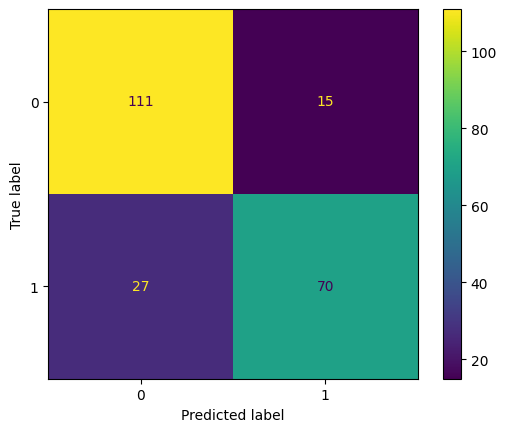

In [91]:
X = df[['Pclass', 'Sex', 'Fare', 'Age', 'Title', 'under_age', 'Traveling_Alone', 'Embarked']]
y = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [92]:
features = ['Pclass', 'Sex', 'Fare', 'Age', 'Title', 'under_age','Traveling_Alone', 'Embarked']
y = df['Survived']

X = pd.get_dummies(df[features])
X_test = pd.get_dummies(test[features])

rf = RandomForestClassifier()

rf.fit(X, y)

y_pred = rf.predict(X_test)

output = pd.DataFrame({'PassengerID': test.PassengerId, 'Survived': y_pred})

output.to_csv('submission.csv', index=False)